# Exploring relationships

## Contents:

#### 1. Importing Libraries and Data
#### 2. Exploring Relationships
##### Correlations: Table, Matplot, Seaborn
##### Scatterplot:
        Number injured/number killed
        Number killed/Congressional District
##### Pair plots
##### Categorical Plots
        Gun Usage
        US Region
#### 3. Observations
##### Answers to Initial Questions
##### Potential Hypothesis

## 1.0 Importing Libraries and Data

### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

# Import data
df = pd.read_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_final.csv'))

In [4]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'n_killed', 'n_injured', 'congressional_district',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'date_int', 'Gun Usage', 'region', 'year',
       'month', 'unemployment_date', 'FR_date', 'unemployment_rate'],
      dtype='object')

## 2.0 Exploring Relationships

### 2.1 Create Subset

In [5]:
# Create subset of only numberical fields
sub = df[['n_killed', 'n_injured', 'congressional_district', 'latitude', 'longitude', 'n_guns_involved', 'state_house_district', 'state_senate_district', 'date_int', 'year', 'month', 'unemployment_rate']]

### 2.2 Correlations

#### Correlation table using pandas

In [6]:
# Create a correlation matrix using subset

sub.corr()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,date_int,year,month,unemployment_rate
n_killed,1.000000,-0.125425,0.055545,-0.078347,-0.073377,-0.028200,-0.006015,-0.010650,0.003119,0.003035,0.002522,0.003509
n_injured,-0.125425,1.000000,-0.007636,-0.011213,-0.000967,-0.038843,-0.030355,-0.044294,0.006501,0.005972,0.017748,-0.005012
congressional_district,0.055545,-0.007636,1.000000,-0.259486,-0.255401,0.021249,0.228827,0.309116,-0.002323,-0.001944,-0.013135,0.005024
latitude,-0.078347,-0.011213,-0.259486,1.000000,0.217098,-0.001271,-0.237957,0.028611,0.015407,0.014913,0.015096,-0.022672
longitude,-0.073377,-0.000967,-0.255401,0.217098,1.000000,0.005187,-0.237430,0.027966,-0.114870,-0.112233,-0.076117,0.115947
n_guns_involved,-0.028200,-0.038843,0.021249,-0.001271,0.005187,1.000000,-0.003324,0.004247,-0.029161,-0.028858,-0.000299,0.023724
state_house_district,-0.006015,-0.030355,0.228827,-0.237957,-0.237430,-0.003324,1.000000,0.431299,-0.005552,-0.005719,0.006871,0.004662
state_senate_district,-0.010650,-0.044294,0.309116,0.028611,0.027966,0.004247,0.431299,1.000000,-0.008937,-0.008966,0.002435,0.003520
date_int,0.003119,0.006501,-0.002323,0.015407,-0.114870,-0.029161,-0.005552,-0.008937,1.000000,0.999612,-0.138764,-0.908200
year,0.003035,0.005972,-0.001944,0.014913,-0.112233,-0.028858,-0.005719,-0.008966,0.999612,1.000000,-0.166297,-0.900589


#### Correlation heatmap using matplot

Text(0.5, 1.0, 'Correlation Matrix')

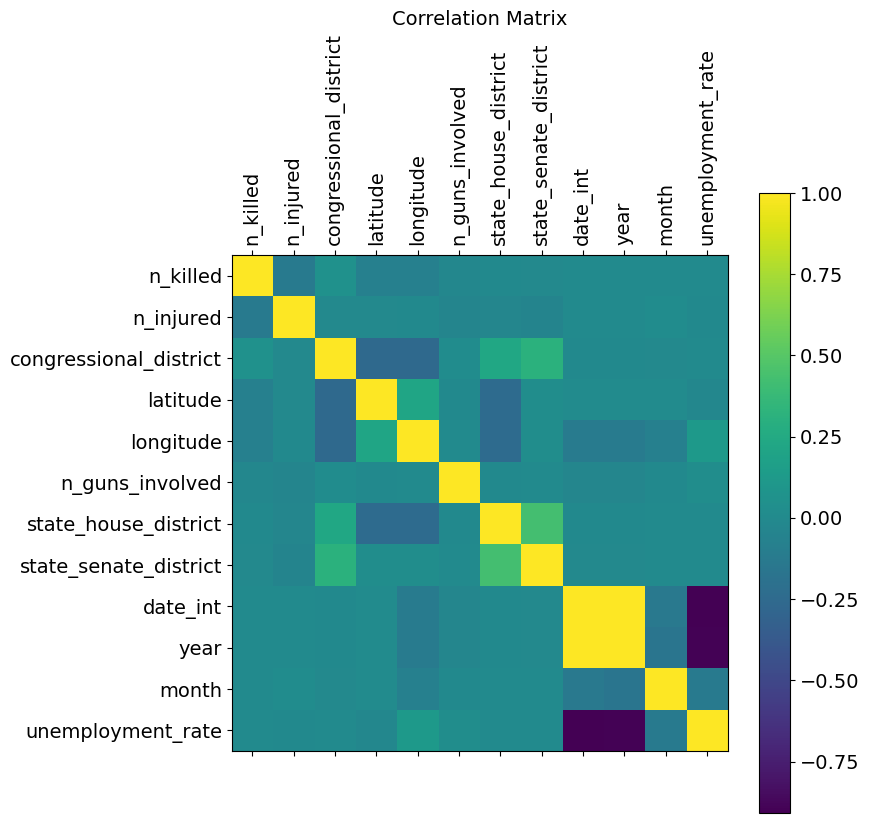

In [7]:
# Matplot Correlation Heatmap

matcorf = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=matcorf.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [8]:
# Save image
matcorf.figure.savefig(os.path.join(path, '04 Analysis', '04 03 Visualizations', 'mat_cor_heatmap_unemployment.png'))

#### Correlation heatmap using seaborn

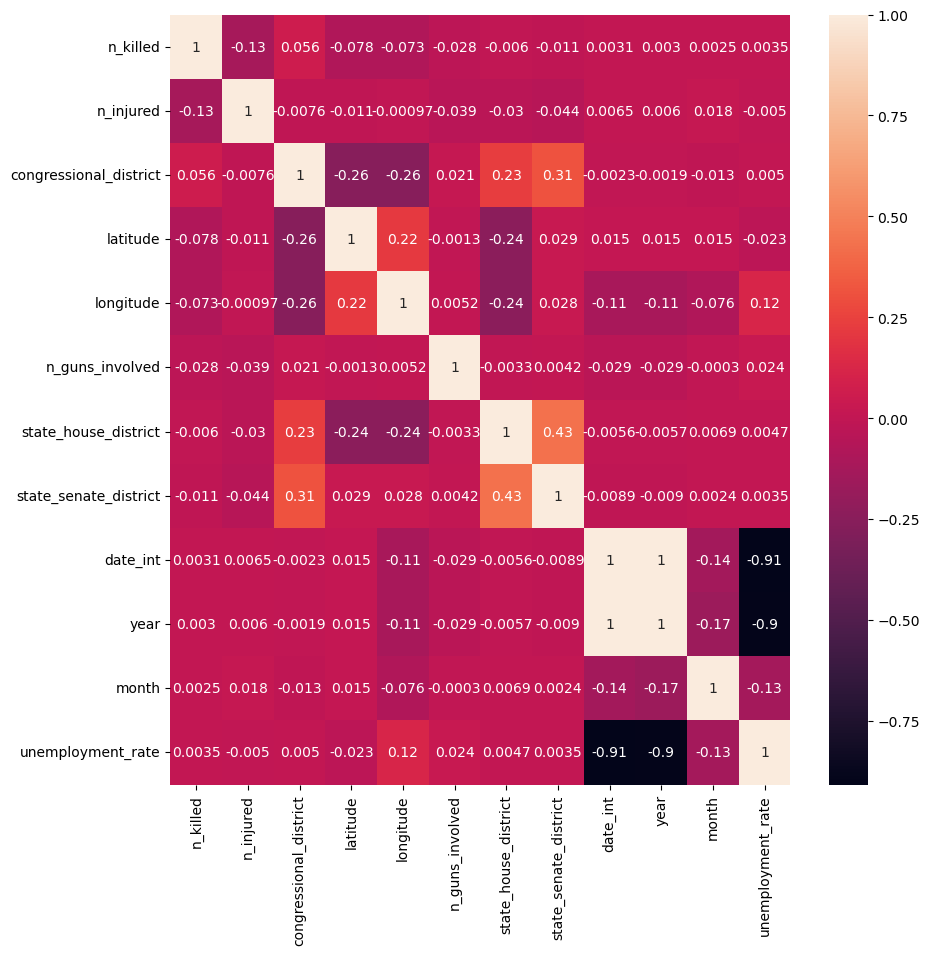

In [9]:
# Create a subplot with matplotlib
seacorf,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

As shown in the correlation matrix, there is a strong correlation between date and unemployment rate, which can be developed further.  There are moderate correlations between government district, which is to be expected since district lines are located geographically.  The strongeset correlations in relation to incidences of gun violence are the number of individuals killed and number injured and the line of latitude and the number of individuals killed.

In [10]:
# Save seaborn correlation matrix
seacorf.figure.savefig(os.path.join(path, '04 Analysis', '04 03 Visualizations', 'sea_cor_heatmap_unemployment.png'))

### 2.2 Scatterplots

#### Number killed and number injured

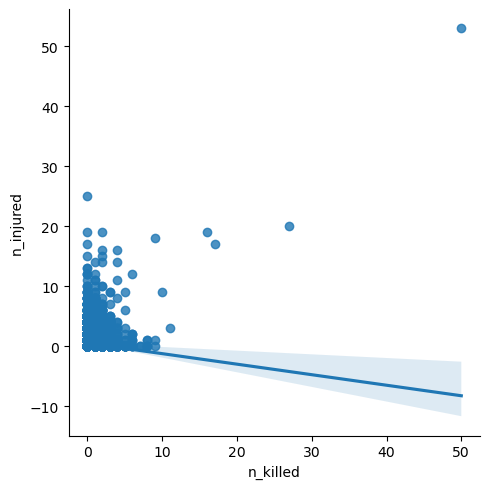

In [12]:
# Scatterplot for the "number killed" and "number injured" columns using seaborn
sns.lmplot(x = 'n_killed', y = 'n_injured', data = sub)

Immediately, the outlier of 50 killed and over 50 injured stands out from the rest of the plots.  This outlier provides some difficultly in review the other data points, but we can still see that there is a weak negative correlation between the number of individuals killed and the number of individuals injured.  Intresting though is that the data points make it look like there is a positive correlation, thus indicating that this isn't a purely linear relationship.

#### Number killed and Congressional district

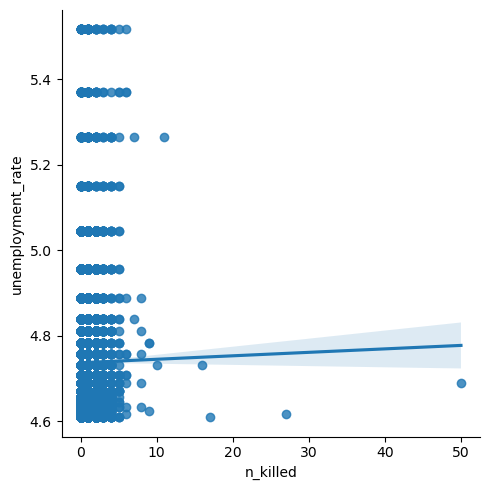

In [11]:
# Scatterplot for the "number killed" and "Congressional district" columns using seaborn
sns.lmplot(x = 'n_killed', y = 'unemployment_rate', data = sub)

### 2.4 Pair Plots

In [7]:
# Pair plot of number killed, number injured, number of guns involved, and congressional district
sub_2 = df[['n_killed', 'n_injured', 'n_guns_involved', 'congressional_district', 'longitude', 
            'latitude', 'date_int', 'unemployment_rate', 'month']]

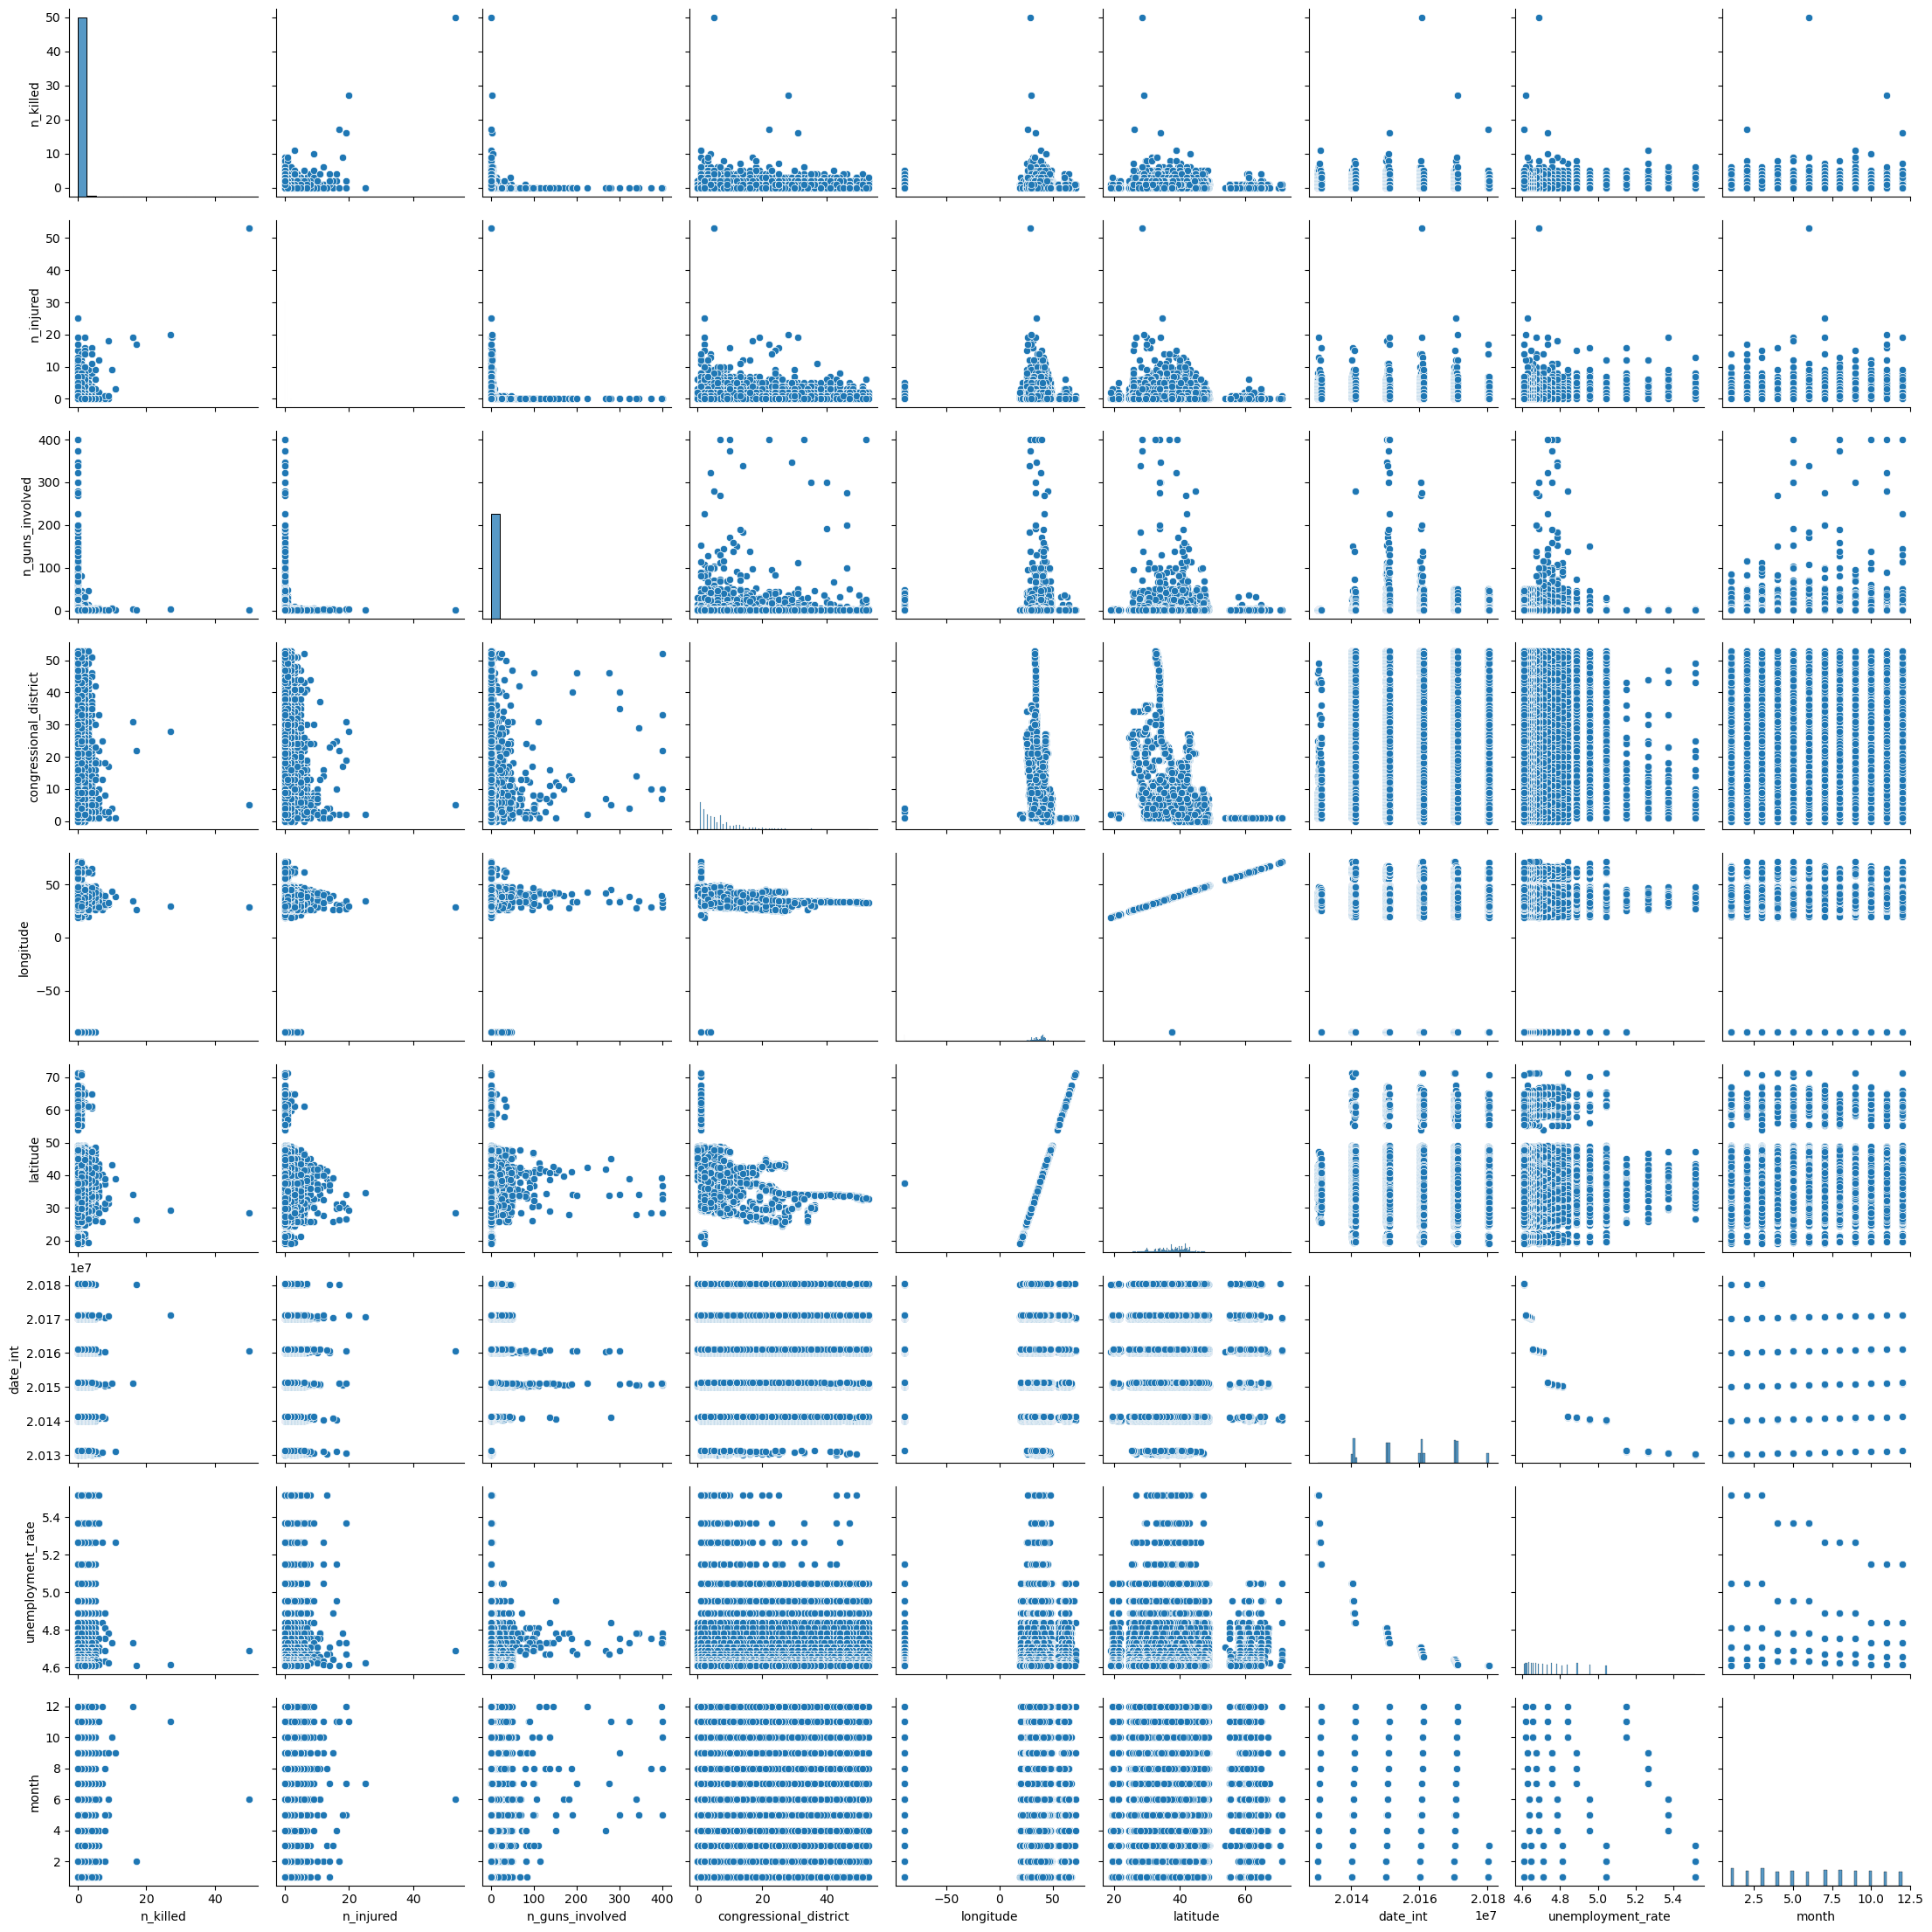

In [8]:
# Create pair plot 
seapairplot = sns.pairplot(sub_2)

In [15]:
# Save seaborn correlation matrix
seapairplot.figure.savefig(os.path.join(path, '04 Analysis', '04 03 Visualizations', 'sea_pairplot.png'))

### 2.5 Categorical Plots

##### Number of guns

<Axes: xlabel='n_guns_involved', ylabel='Count'>

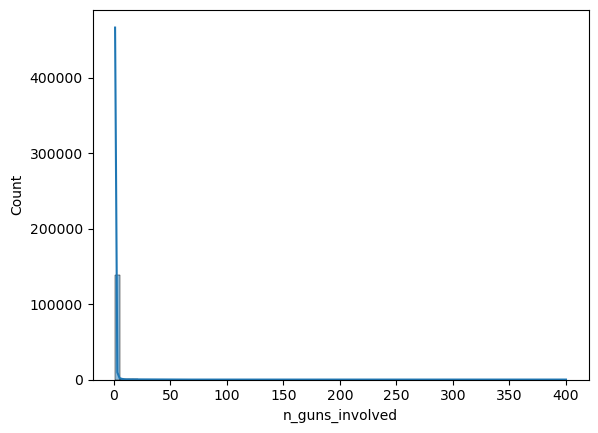

In [16]:
# Histogram of number of guns involved
sns.histplot(df['n_guns_involved'], bins = 100, kde = True)

In [31]:
df['n_guns_involved'].value_counts(dropna = False)

1.0      127548
NaN       99451
2.0        7477
3.0        2021
4.0         871
          ...  
158.0         1
189.0         1
85.0          1
96.0          1
127.0         1
Name: n_guns_involved, Length: 107, dtype: int64

In [25]:
df.loc[df['n_guns_involved'] == 1, 'Gun Usage'] = 'Single Gun'

In [26]:
df.loc[(df['n_guns_involved'] > 1) & (df['n_guns_involved'] <= 5), 'Gun Usage'] = 'Multiple Guns'

In [27]:
df.loc[df['n_guns_involved'] >= 6, 'Gun Usage'] = 'Mass Guns'

In [32]:
df['Gun Usage'].value_counts(dropna = False)

Single Gun       127548
NaN               99451
Multiple Guns     10804
Mass Guns          1874
Name: Gun Usage, dtype: int64

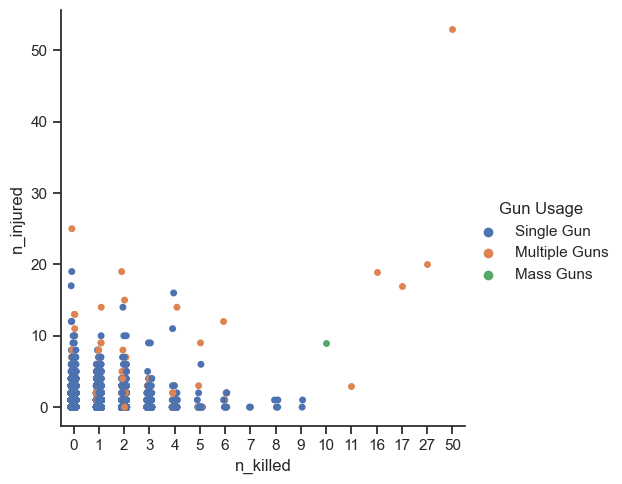

In [33]:
# Categorical plot of gun usage, number killed and injured
sns.set(style="ticks")
catplot_guns = sns.catplot(x="n_killed", y="n_injured", hue="Gun Usage", data=df)

What the categorical plot involving the number of individuals killed, injured and number of guns invovled indicates is that the greater majority of incidents involved a single gun over any other number of guns involved.  I would also conclude that after the data mark of 10 individuals injured or killed, the likelihood that more than one gun was used increases.

In [34]:
# Save categorical plot
catplot_guns.figure.savefig(os.path.join(path, '04 Analysis', '04 03 Visualizations', 'catplot_guns.png'))

##### US Region

In [35]:
# Assign states to region and put region in empty set
region = []

for value in df['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append('West')
    else:
        region.append('Not identified')

In [36]:
# Add set as 'region' column
df['region'] = region

In [37]:
# Determine number of orders per region
df['region'].value_counts(dropna = False)

South        106664
Midwest       61044
Northeast     36314
West          35655
Name: region, dtype: int64

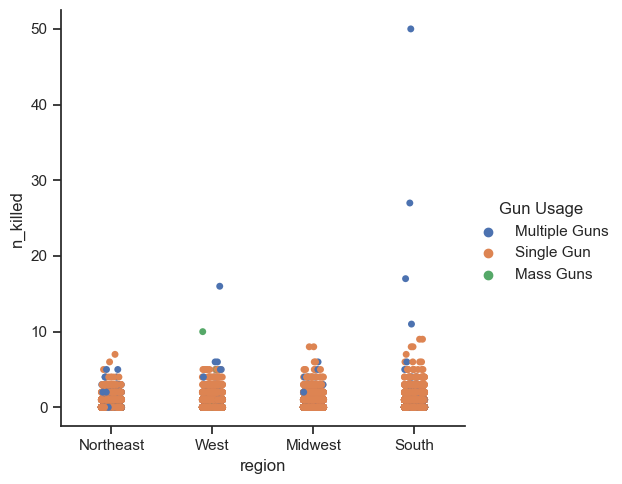

In [38]:
# Categorical plot of region, number killed and injured
sns.set(style="ticks")
catplot_region = sns.catplot(x="region", y="n_killed", hue="Gun Usage", data=df)

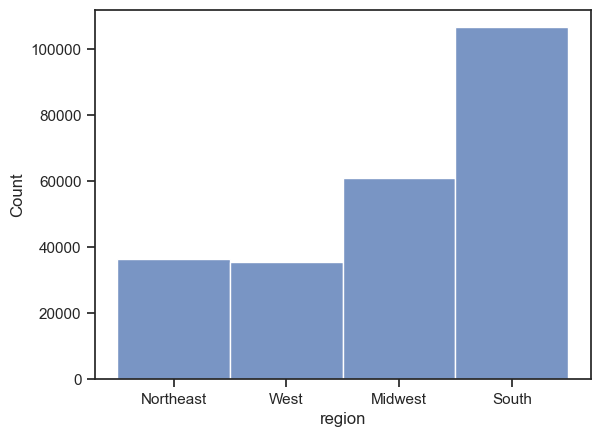

In [40]:
# Histogram of number incidents in the region
hist_region = sns.histplot(df['region'], bins = 100, kde = False)

Adding a region category to the dataset provides allows us to see that the south region has the greatest number of incidences.  We can see that they have almost twice as many as the next highest region, the midwest.  Additionally, when we compare the number of individuals killed in each region, we can see that the south has a tendency to have more individuals killed per instance as well.

In [41]:
# Save visuals
catplot_region.figure.savefig(os.path.join(path, '04 Analysis', '04 03 Visualizations', 'catplot_region.png'))
hist_region.figure.savefig(os.path.join(path, '04 Analysis', '04 03 Visualizations', 'hist_region.png'))

In [43]:
# Export dataframe
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

# Import data
df.to_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_clean_addition.csv'))

## 3.0 Observations

### 3.1 Initial Questions

#### Initial Questions:
    Which states were reported for the most deaths? injuries? guns involved?
    How did gun violence show up in each government district? (deaths, injuries, guns involved)
    How did gun violence change geographically over the five years?
    Is there any significant correlation between gun violence and age, age groups, or genders?

Based on the information discovered in this initial phase of reseaching correlations and starting to find relationships, I don't feel like any of these questions can be answered at this time.  However, regions and the relationship of each region to the incidences needs to be further explored.  The initial visualizations show that the South has the greatest number of incidences and the most individuals killed per incident.  

### 3.2 Initial Hypothesis

Finding ways to decrease use of guns in the south region will decrease the number of individuals killed or injured from gun violence in the US each year.

